In [210]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Obtain

In [211]:
#mport coffee quality dataset from csv
data = pd.read_csv('Coffee-modified.csv')

In [212]:
data.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## 2 - Scrub

### 2.1 - Reformat column names

In [213]:
#write a function to lowercase col names and replacce their spaces/dots with underscores
def column_fixer(data):
    #iterate through columns
    for column in data.columns:
        #lowercase the col name
        new = column.lower()
        #check if col name contains dot or space
        if '.' or ' ' in column:
            #replace dots and spaces with underscores
            new = new.replace('.', '_')
            new = new.replace(' ', '_')
        #create dict to specify col name change
        new_dict = {column:new}
        #use dict to rename col
        data.rename(columns=new_dict, inplace=True)
        #return df with cleaned col names
    return data

In [214]:
#run the dataframe through the column fixer
data = column_fixer(data)

In [215]:
#view new column names
data.columns

Index(['id', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### 2.2 - Remove unwanted features

There are numerous features in this dataset, but I want to exclude anything that could not be determined from the coffee itself, like 'altitude' or 'processing_method'. Here, I make a list of the features that express actual attributes of the coffee.

In [216]:
#add desired quality measures to a list
quality_measures = ['country_of_origin',
                    'aroma',
                    'flavor',
                    'aftertaste',
                    'acidity',
                    'body',
                    'balance',
                    'uniformity',
                    'clean_cup',
                    'sweetness',
                    'moisture',
                    'category_one_defects',
                    'category_two_defects']

In [217]:
#keep only the features in the 'quality_measures' list
data = data[quality_measures]

### 2.3 - Remove null values

In [218]:
#get total number of null-value samples for each feature
data.isna().sum()

country_of_origin        3
aroma                    8
flavor                  10
aftertaste              10
acidity                 10
body                    10
balance                 10
uniformity              10
clean_cup               12
sweetness               11
moisture                11
category_one_defects    11
category_two_defects    12
dtype: int64

In [219]:
#drop all samples with null values
data = data.dropna()

In [220]:
#check dataframe again to ensure all null values have been removed
data.isna().sum()

country_of_origin       0
aroma                   0
flavor                  0
aftertaste              0
acidity                 0
body                    0
balance                 0
uniformity              0
clean_cup               0
sweetness               0
moisture                0
category_one_defects    0
category_two_defects    0
dtype: int64

In [221]:
#check to see how many usable samples remain
len(data)

1306

### 2.4 - Remove samples that are not from the 10 most common target categories

In [222]:
#create list of top ten most prolific coffee-producing countries in this dataset
top_ten = data.country_of_origin.value_counts()[:10].index

In [223]:
#keep samples from the top 10 countries list
data = data[data.country_of_origin.isin(top_ten)]

In [224]:
data.head()

,country_of_origin,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,category_one_defects,category_two_defects
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0,0.0
1,Ethiopia,8.75,8.67,8.5,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,1.0
2,Guatemala,8.42,8.5,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0,0,0.0
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0,2.0
4,Ethiopia,8.25,8.5,8.25,8.5,8.42,8.33,10.0,10.0,10.0,0.12,0,2.0


In [225]:
#check new data to ensure only samples from the top 10 countries are included
data.country_of_origin.unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'United States (Hawaii)',
       'Costa Rica', 'Mexico', 'Honduras', 'Taiwan',
       'Tanzania, United Republic Of', 'Colombia'], dtype=object)

### 2.5 - Remove a remaining blank row

Looking through the data, I noticed a row with lots of zero values, which I need to remove.

In [226]:
#get rid of entry with several 0 values
data.drop(1318, inplace=True)

In [227]:
data.shape

(1063, 13)

### 2.6 - Split data into 'feature' & 'target' DataFrames, and convert all feature data to float type

All coffee feature data is continuous or ordinal, so we convert all columns to the float type.

In [228]:
#check current data types
data.dtypes

country_of_origin        object
aroma                    object
flavor                   object
aftertaste               object
acidity                  object
body                    float64
balance                 float64
uniformity              float64
clean_cup               float64
sweetness               float64
moisture                 object
category_one_defects     object
category_two_defects    float64
dtype: object

In [229]:
#cast all feature columns to float type, writing 
data_features = data.iloc[:,1:].astype('float')

In [230]:
#write country-of-origin target data to it's own dataframe
data_target = data['country_of_origin']

In [231]:
data_features.head()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,category_one_defects,category_two_defects
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,0.0,0.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0.0,1.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,0.0,0.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,0.0,2.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0.0,2.0


### 2.7 - Apply min-max scaling to feature data

In [232]:
from sklearn import preprocessing

In [233]:
#instantiate min-max scaler
min_max_scaler = preprocessing.MinMaxScaler()

In [234]:
#0-to-1 scale features and put it in a new DataFrame
data_features_scaled = min_max_scaler.fit_transform(data_features)

In [235]:
#rewrite dataframe with column data from before scaling, as it must have been lost
data_features_scaled = pd.DataFrame(data=data_features_scaled, columns=data_features.columns)

In [236]:
data_features_scaled.tail()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,category_one_defects,category_two_defects
1058,0.433243,0.152727,0.000,0.405714,0.474474,0.000000,0.5,0.800,0.769319,0.454545,0.0,0.072727
1059,0.523161,0.032727,0.000,0.405714,0.375375,0.000000,0.5,0.800,0.769319,0.454545,0.0,0.054545
1060,0.523161,0.090909,0.000,0.357143,0.426426,0.000000,0.5,0.800,0.769319,0.454545,0.0,0.072727
1061,0.544959,0.272727,0.032,0.620000,0.600601,0.224806,1.0,0.000,1.000000,0.500000,0.0,0.363636
1062,0.659401,0.214545,0.200,0.691429,0.624625,0.193798,0.5,0.133,0.000000,0.454545,0.0,0.072727


## 3. Explore

### 3.1 - Render a histogram for each feature

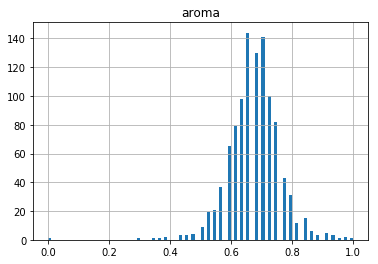

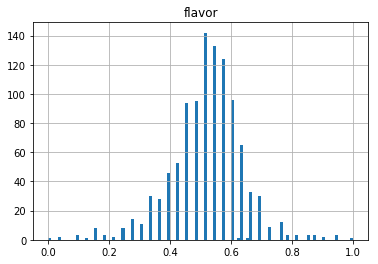

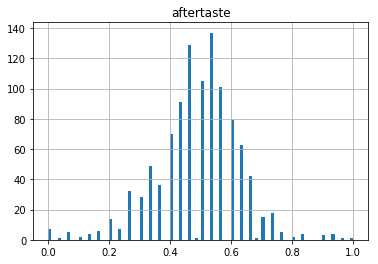

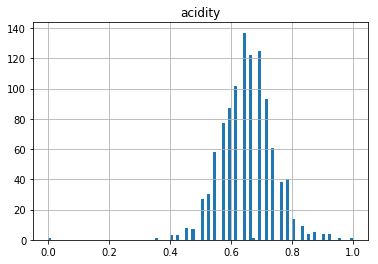

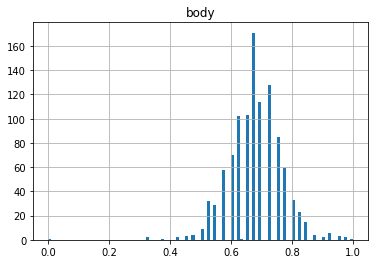

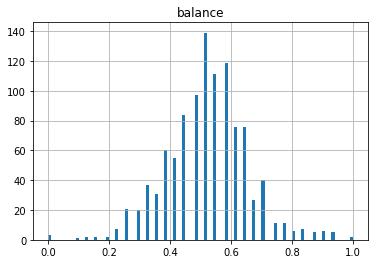

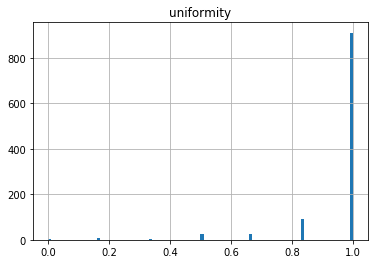

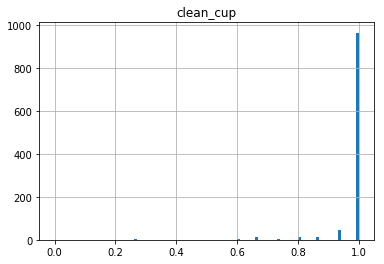

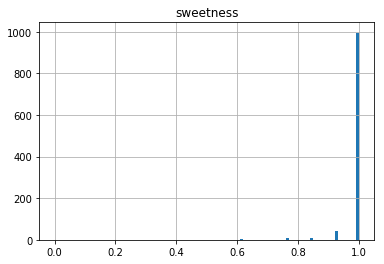

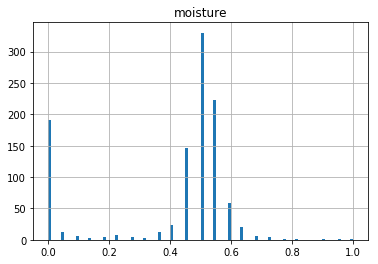

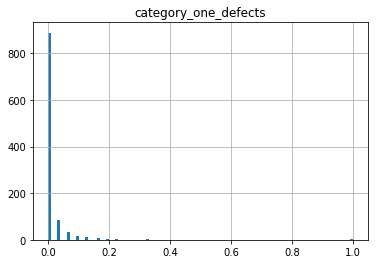

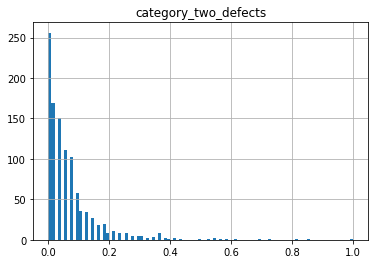

In [237]:
#iterate through all features and produce a histogram of each
for col in data_features_scaled.columns:
    data_features_scaled[col].hist(bins=100)
    plt.title(col)
    plt.show()

### 3.2 - Render a box plot for each feature

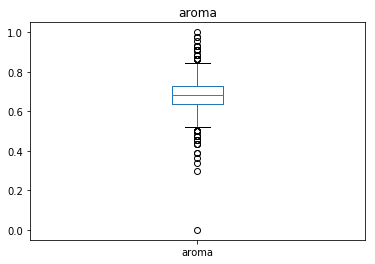

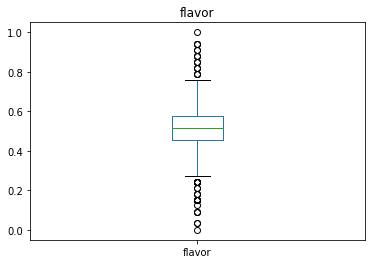

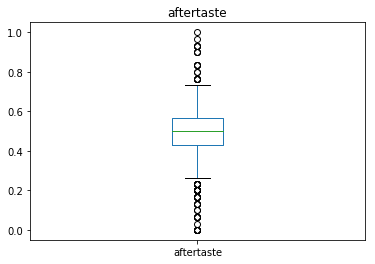

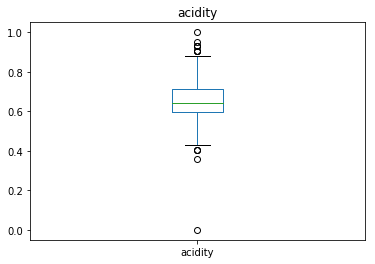

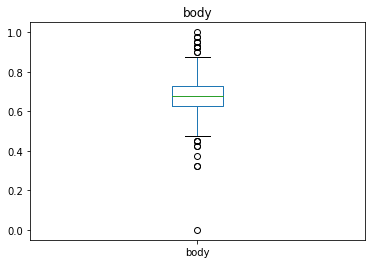

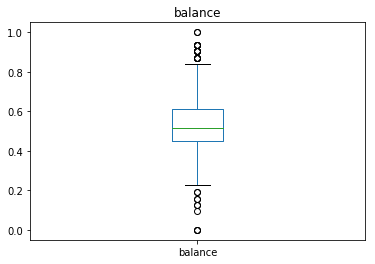

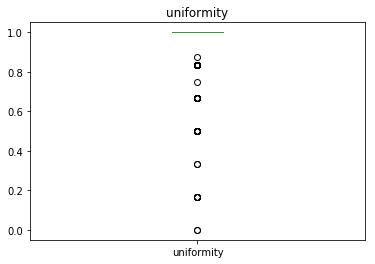

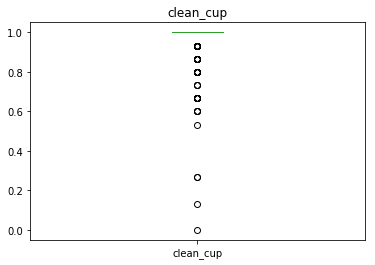

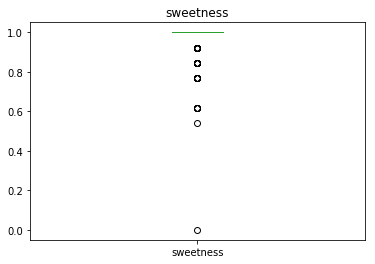

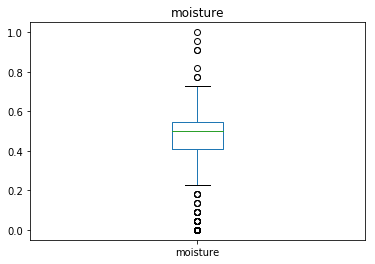

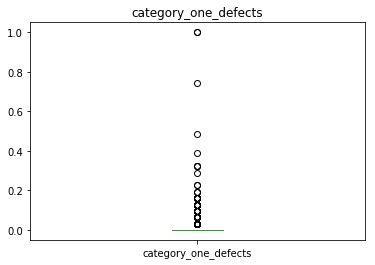

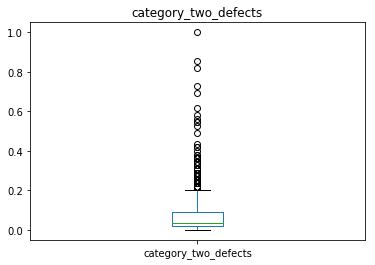

In [238]:
#iterate through all features and produce a boxplot of each
for col in data_features_scaled.columns:
    data_features_scaled[col].plot(kind='box')
    plt.title(col)
    plt.show()

### 3.3 - Create a scatter plot of two interesting features for the fun of it

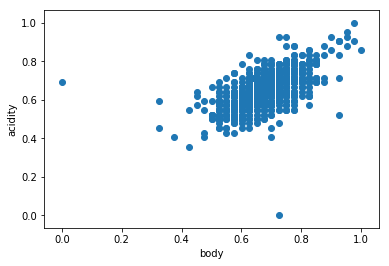

In [239]:
#plot acidity and body against each other to see if there's a relationship
plt.scatter(data_features_scaled['body'], data_features_scaled['acidity'])
plt.xlabel('body')
plt.ylabel('acidity')
plt.show()

### 3.4 - Check for multicollinearity in case we use logistic regression modeling

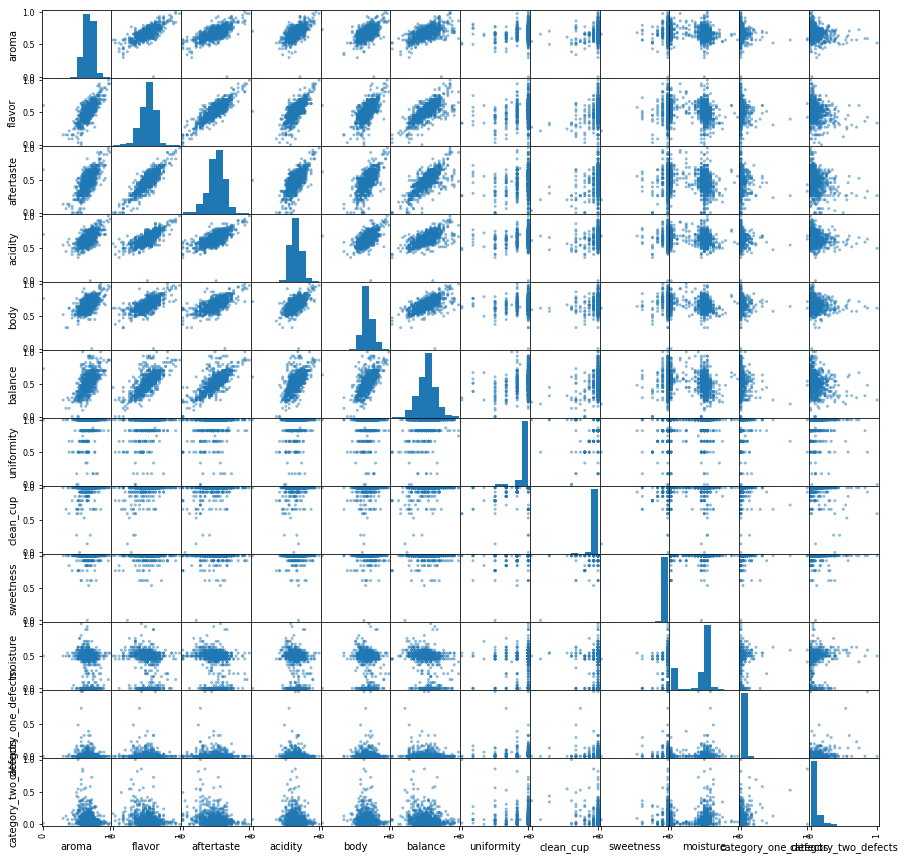

In [240]:
#plot a scatter matrix of all feature correlations
pd.plotting.scatter_matrix(data_features_scaled,figsize  = [15, 15]);

In [241]:
import seaborn as sns

In [242]:
#view a numerical version of the above scatter matrix, showing pearson correlation coefficients
data_features_scaled.corr()

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,category_one_defects,category_two_defects
aroma,1.000000,0.729794,0.681788,0.593803,0.545944,0.586253,0.140707,0.184547,0.037366,-0.176698,-0.098395,-0.208861
flavor,0.729794,1.000000,0.855530,0.728963,0.645540,0.717273,0.218390,0.283084,0.098853,-0.178105,-0.063572,-0.238641
aftertaste,0.681788,0.855530,1.000000,0.687015,0.656779,0.750154,0.196198,0.270421,0.080336,-0.223173,-0.086316,-0.242948
acidity,0.593803,0.728963,0.687015,1.000000,0.603428,0.621408,0.136177,0.133796,-0.000264,-0.154299,-0.067819,-0.145663
body,0.545944,0.645540,0.656779,0.603428,1.000000,0.657399,0.060112,0.105079,0.001857,-0.211659,-0.023889,-0.120164
balance,0.586253,0.717273,0.750154,0.621408,0.657399,1.000000,0.213480,0.250540,0.078685,-0.272459,-0.073118,-0.196400
uniformity,0.140707,0.218390,0.196198,0.136177,0.060112,0.213480,1.000000,0.424893,0.362166,0.030165,-0.141100,-0.181035
clean_cup,0.184547,0.283084,0.270421,0.133796,0.105079,0.250540,0.424893,1.000000,0.391942,-0.001665,-0.126091,-0.269608
sweetness,0.037366,0.098853,0.080336,-0.000264,0.001857,0.078685,0.362166,0.391942,1.000000,0.080104,-0.058166,-0.052580
moisture,-0.176698,-0.178105,-0.223173,-0.154299,-0.211659,-0.272459,0.030165,-0.001665,0.080104,1.000000,0.046520,0.152657


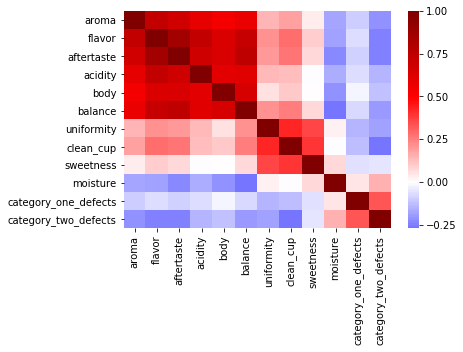

In [243]:
#produce correlation heatmap
sns.heatmap(data_features_scaled.corr(), center=0, cmap='seismic');

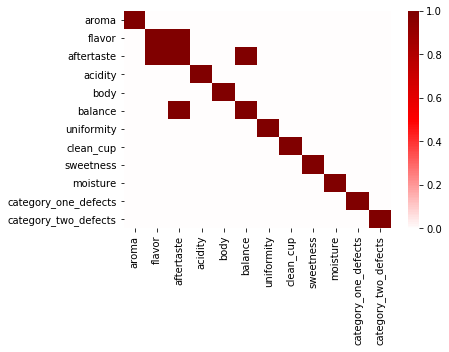

In [244]:
#only show correlations where r > .75
sns.heatmap(data_features_scaled.corr()>.75, center=0, cmap='seismic');

### Check for class imbalance

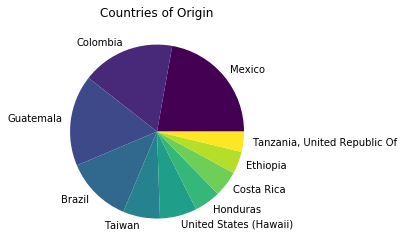

In [245]:
#create pie chart to visualize class imbalance among coffee samples
data_target.value_counts().plot(kind='pie', colormap='viridis')
plt.title('Countries of Origin')
plt.ylabel('')
plt.show()

## 4 - Model

In [246]:
#split data into train and test sets
X_train, X_test, y_train, y_test = sel.train_test_split(
    data_features_scaled, 
    data_target,
    test_size=0.2)

   ### 4.1 - Support Vector Classifier

I decided to start modeling with SVC's because they're relatively quick to run.

In [247]:
from sklearn import model_selection as sel, svm, preprocessing

In [248]:
#instantiate svc classifier
clf = svm.SVC(kernel='linear', class_weight='balanced')

In [249]:
#fit classifier to training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [250]:
#check the model score with test data
svc_score = clf.score(X_test, y_test)
print(svc_score)

0.323943661971831


To keep track of model accuracy as we try different models, I'll start a high scores dictionary

In [251]:
high_scores = {'svc':svc_score}

In [253]:
#check the mode score (accuracy of a model that picks the category with the most samples)
mode_score = data.country_of_origin.value_counts()[0]/len(data)
print(mode_score)
high_scores['mode'] = mode_score

0.22201317027281278


In [208]:
#print a statement with the accuracy score difference between svc and mode models
svm_accu_diff = round((svc_score - mode_score) * 100, 3)
print(f'SVC is {svm_accu_diff}% more accurate than taking the mode.')

NameError: name 'svc_score' is not defined

Let's adjust the C hyperparameter incrementally, graphing the results.

In [256]:
from pylab import *

#write a function to graph the accuracy score with changing C values
def c_graph(xtr,xte,ytr,yte):
    c_list = []
    scores = []
    #search range is unfortunately hardcoded
    for C in range(8000,14000, 25):
        c_list.append(C)
        clf = svm.SVC(kernel='rbf', class_weight='balanced', C=C)
        clf.fit(xtr, ytr)
        score = clf.score(xte, yte)
        scores.append(score)
    #plot collected list of accuracy scores
    plot(c_list, scores)
    return c_list, scores
    

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/skle

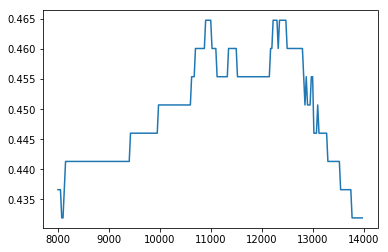

In [257]:
#run C accuracy graphing function
c_scale, accu_scores = c_graph(X_train, X_test, y_train, y_test)

In [263]:
pd.DataFrame(data=accu_scores, index=c_scale).sort_values(by=0, ascending=False)

,0
11000,0.464789
12475,0.464789
10900,0.464789
10925,0.464789
10950,0.464789
10975,0.464789
12225,0.464789
12275,0.464789
12300,0.464789
12350,0.464789


In [264]:
high_scores['svc c=11,000'] = 0.464789

Here, I remembered that people have already created excellent model selection functions.

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [265]:
#write parameter grid for randomized model search to use
parameters = {
    'kernel':('rbf', 'poly',),
    #search mainly for c values around 11,000
    'C':list(range(10500,11500, 5)), }

In [266]:
#instantiate model with a few hardcoded parameters
svc = svm.SVC(gamma='scale', class_weight='balanced')

In [267]:
#instantiate model searcher
clf = RandomizedSearchCV(svc, parameters, cv=3, n_iter=10)

In [268]:
#search for svc models
clf.fit(data_features_scaled, data_target)

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'kernel': ('rbf', 'poly'), 'C': [10500, 10505, 10510, 10515, 10520, 10525, 10530, 10535, 10540, 10545, 10550, 10555, 10560, 10565, 10570, 10575, 10580, 10585, 10590, 10595, 10600, 10605, 10610, 10615, 10620, 10625, 10630, 10635, 10640, 10645, 10650, 10655, 10660, 10665, 10670, 1..., 11430, 11435, 11440, 11445, 11450, 11455, 11460, 11465, 11470, 11475, 11480, 11485, 11490, 11495]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [269]:
#view results in a dataframe sorted by accuracy score
pd.DataFrame(clf.cv_results_).sort_values(['rank_test_score'])

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nathan/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,14.387879,3.707234,0.007209,0.000142,poly,11165,"{'kernel': 'poly', 'C': 11165}",0.287709,0.392655,0.341880,0.340546,0.042954,1,0.912057,0.904090,0.883427,0.899858,0.012065
8,14.491939,4.354874,0.007062,0.000545,poly,10900,"{'kernel': 'poly', 'C': 10900}",0.287709,0.389831,0.344729,0.340546,0.041891,1,0.909220,0.904090,0.880618,0.897976,0.012451
9,15.905898,5.298024,0.006813,0.000173,poly,11020,"{'kernel': 'poly', 'C': 11020}",0.287709,0.389831,0.344729,0.340546,0.041891,1,0.909220,0.904090,0.882022,0.898444,0.011799
0,12.893848,3.396009,0.006756,0.000110,poly,10755,"{'kernel': 'poly', 'C': 10755}",0.287709,0.389831,0.341880,0.339605,0.041819,4,0.909220,0.902680,0.880618,0.897506,0.012236
3,15.047771,4.700586,0.007728,0.001464,poly,11460,"{'kernel': 'poly', 'C': 11460}",0.287709,0.381356,0.341880,0.336783,0.038487,5,0.912057,0.904090,0.884831,0.900326,0.011429
6,0.393684,0.054405,0.012270,0.000214,rbf,10720,"{'kernel': 'rbf', 'C': 10720}",0.248603,0.401130,0.333333,0.327375,0.062554,6,0.878014,0.871650,0.841292,0.863652,0.016023
1,0.370526,0.059656,0.011592,0.000192,rbf,11235,"{'kernel': 'rbf', 'C': 11235}",0.248603,0.401130,0.330484,0.326435,0.062479,7,0.878014,0.873061,0.842697,0.864590,0.015613
2,0.371308,0.067571,0.011755,0.000308,rbf,10755,"{'kernel': 'rbf', 'C': 10755}",0.248603,0.401130,0.330484,0.326435,0.062479,7,0.876596,0.873061,0.841292,0.863650,0.015875
4,0.565261,0.094259,0.016594,0.001189,rbf,10555,"{'kernel': 'rbf', 'C': 10555}",0.248603,0.401130,0.330484,0.326435,0.062479,7,0.876596,0.871650,0.841292,0.863179,0.015608
7,0.426002,0.082317,0.013186,0.000668,rbf,11255,"{'kernel': 'rbf', 'C': 11255}",0.248603,0.401130,0.330484,0.326435,0.062479,7,0.878014,0.873061,0.842697,0.864590,0.015613


In [ ]:
#take a look at the most accurate model and its parameters
clf.best_estimator_

In [ ]:
high_scores['svc c=11,165, cv=3, kernel=poly'] = clf.best_score_

### 4.2 - K-nearest Neighbors

In [275]:
from sklearn.neighbors import KNeighborsClassifier

#### 4.2.1 - Instantiate with default parameters

In [276]:
#instantiate KNN classifier
neigh = KNeighborsClassifier()

In [277]:
#fit classifier to training data
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [282]:
#get accuracy score
score = neigh.score(X_test, y_test)
print(score)

0.38967136150234744


In [281]:
#record score in high scores dictionary for later analysis
high_scores['KNN defaults'] = score

#### 4.2.2 - Instantiate with different numbers of neighbors

In [65]:
#instantiate new classifier with a higher neighbor count
neigh = KNeighborsClassifier(n_neighbors=10)

In [283]:
#fit classifier to training data
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [284]:
#score the classifier
score = neigh.score(X_test, y_test)

0.38967136150234744

In [286]:
#store in high scores dict
high_scores['KNN 10 neighbors'] = score

#### 4.2.3 - Try KNN with cross validation and randomized model search

In [70]:
parameters = {
    'weights':['uniform', 'distance'], 
    'n_neighbors':[10,30,90,270],
    'algorithm':['ball_tree', 'kd_tree', 'brute']}
neigh = KNeighborsClassifier()
clf = RandomizedSearchCV(neigh, parameters, cv=5, n_iter=1000)
clf.fit(data_features_scaled, data_target)
rand_search_results = pd.DataFrame(clf.cv_results_)
rand_search_results.sort_values('rank_test_score').head()

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 24 is smaller than n_iter=1000. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.003125,0.000426,0.019529,0.002234,uniform,270,ball_tree,"{'weights': 'uniform', 'n_neighbors': 270, 'al...",0.281106,0.364486,...,0.316087,0.040451,1,0.36643,0.328622,0.316471,0.332943,0.358314,0.340556,0.01879
14,0.002834,0.000384,0.018461,0.000616,uniform,270,kd_tree,"{'weights': 'uniform', 'n_neighbors': 270, 'al...",0.281106,0.364486,...,0.316087,0.040451,1,0.36643,0.328622,0.316471,0.332943,0.358314,0.340556,0.01879
22,0.003712,0.000813,0.018223,0.006049,uniform,270,brute,"{'weights': 'uniform', 'n_neighbors': 270, 'al...",0.281106,0.364486,...,0.316087,0.040451,1,0.36643,0.328622,0.316471,0.332943,0.358314,0.340556,0.01879
23,0.003462,0.000191,0.020451,0.001426,distance,270,brute,"{'weights': 'distance', 'n_neighbors': 270, 'a...",0.248848,0.383178,...,0.309501,0.049290,4,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
7,0.003278,0.000598,0.022698,0.002439,distance,270,ball_tree,"{'weights': 'distance', 'n_neighbors': 270, 'a...",0.248848,0.383178,...,0.309501,0.049290,4,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000


### 4.3 - Random forests

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf = RandomForestClassifier()

In [73]:
clf.fit(X_train, y_train)

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
clf.score(X_test, y_test)

0.431924882629108

Here we have a new accuracy record of >43%!

In [75]:
print(clf.feature_importances_)

[0.09763035 0.10991137 0.12638701 0.11954619 0.10417515 0.11945479
 0.02896515 0.01266898 0.01294776 0.12706686 0.03105583 0.11019057]


In [95]:
features = pd.DataFrame(columns=['Importance'],index=X_train.columns, data=clf.feature_importances_)

In [99]:
features

,Importance
aroma,0.097630
flavor,0.109911
aftertaste,0.126387
acidity,0.119546
body,0.104175
balance,0.119455
uniformity,0.028965
clean_cup,0.012669
sweetness,0.012948
moisture,0.127067


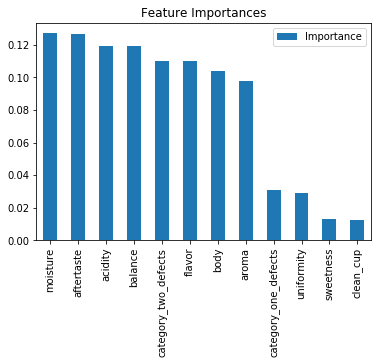

In [103]:
features.sort_values(by='Importance', ascending=False).plot(kind='bar', subplots=True)
plt.title('Feature Importances')
plt.ylabel('')
plt.show()

In [105]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [290]:
weights = {}
indices = data_target.value_counts().index
x=0
for i in data_target.value_counts():
    weights[indices[x]] = i/len(data_target)
    x += 1


In [291]:
weights

{'Mexico': 0.22201317027281278,
 'Colombia': 0.17215428033866415,
 'Guatemala': 0.16933207902163688,
 'Brazil': 0.12323612417685795,
 'Taiwan': 0.06867356538099718,
 'United States (Hawaii)': 0.06867356538099718,
 'Honduras': 0.04891815616180621,
 'Costa Rica': 0.04797742238946378,
 'Ethiopia': 0.041392285983066796,
 'Tanzania, United Republic Of': 0.03762935089369708}

In [136]:
parameters = {
    'max_depth':[10, 25, 50, 100, 300], 
    'max_features':[2,3,4,5,6],
    'min_samples_leaf':[10,30,50,100],
    'bootstrap':[True,False],
    'warm_start':[True,False]}

forest = RandomForestClassifier(class_weight=weights, random_state=0)

clf = GridSearchCV(forest, parameters, cv=5)

clf.fit(data_features_scaled, data_target)

rand_search_results = pd.DataFrame(clf.cv_results_)

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-pa

In [133]:
rand_search_results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
156,0.026220,0.000900,0.003882,0.000678,False,50,6,10,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.301676,0.330508,0.319088,0.317027,0.011887,1,0.611348,0.572638,0.560393,0.581459,0.021717
196,0.018485,0.000780,0.002963,0.000249,False,300,6,10,"{'bootstrap': False, 'max_depth': 300, 'max_fe...",0.287709,0.341808,0.313390,0.314205,0.022145,2,0.611348,0.588152,0.574438,0.591313,0.015233
157,0.019232,0.001757,0.003365,0.000494,False,50,6,30,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",0.268156,0.370056,0.304843,0.314205,0.042213,2,0.463830,0.449929,0.445225,0.452995,0.007899
116,0.022637,0.003258,0.003489,0.000437,False,10,6,10,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",0.307263,0.338983,0.293447,0.313264,0.019028,4,0.598582,0.555712,0.566011,0.573435,0.018272
132,0.016992,0.000512,0.002746,0.000101,False,25,5,10,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.301676,0.327684,0.304843,0.311383,0.011591,5,0.601418,0.565585,0.567416,0.578140,0.016477


### 4.4 - Gradient Boosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
par = {
    'learning_rate':[0.05, 0.1, 0.2, 0.3],
    'max_features':[2,3,4,5,6,7]}

In [202]:
clf = GradientBoostingClassifier()
search_clf = RandomizedSearchCV(clf, par, n_iter=100)
search_clf.fit(data_features_scaled, data_target)
result = pd.DataFrame(search_clf.cv_results_)

/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/nathan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a 

In [200]:
print(result.head())

AttributeError: 'tuple' object has no attribute 'head'

### 4.5 - Why is it so hard to get passable accuracy scores?

Here, we will do a little histogram overlaying to see how the distributions of features differ between countries. We will start with the feature considered most important by the random forest classifier: moisture.

In [335]:
hists = pd.concat([data_target.reset_index(), data_features_scaled.reset_index(inplace=False)], axis=1)

In [336]:
hists

,index,country_of_origin,index,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,moisture,category_one_defects,category_two_defects
0,0,Ethiopia,0,0.978202,1.000000,1.000,1.000000,0.975976,0.872093,1.0000,1.000,1.000000,0.545455,0.000000,0.000000
1,1,Ethiopia,1,1.000000,0.941818,0.932,0.951429,0.951952,0.872093,1.0000,1.000,1.000000,0.545455,0.000000,0.018182
2,2,Guatemala,2,0.910082,0.880000,0.900,0.905714,0.924925,0.872093,1.0000,1.000,1.000000,0.000000,0.000000,0.000000
3,3,Ethiopia,3,0.841962,0.909091,0.900,0.905714,0.975976,0.806202,1.0000,1.000,1.000000,0.500000,0.000000,0.036364
4,4,Ethiopia,4,0.863760,0.880000,0.832,0.928571,0.951952,0.837209,1.0000,1.000,1.000000,0.545455,0.000000,0.036364
5,5,Brazil,5,0.953678,0.850909,0.900,0.928571,0.900901,0.837209,1.0000,1.000,1.000000,0.500000,0.000000,0.018182
6,7,Ethiopia,6,0.863760,0.818182,0.932,0.905714,0.924925,0.903101,1.0000,1.000,0.922722,0.136364,0.000000,0.000000
7,8,Ethiopia,7,0.978202,0.941818,0.964,0.905714,0.924925,0.872093,0.8325,1.000,0.922722,0.136364,0.000000,0.000000
8,9,Ethiopia,8,0.817439,0.909091,0.932,0.928571,0.726727,0.872093,1.0000,1.000,1.000000,0.454545,0.000000,0.072727
9,10,Ethiopia,9,0.841962,0.941818,0.832,0.928571,0.750751,0.775194,1.0000,1.000,1.000000,0.454545,0.000000,0.018182


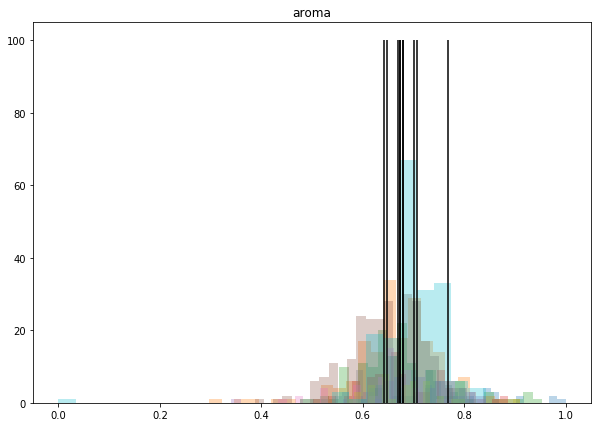

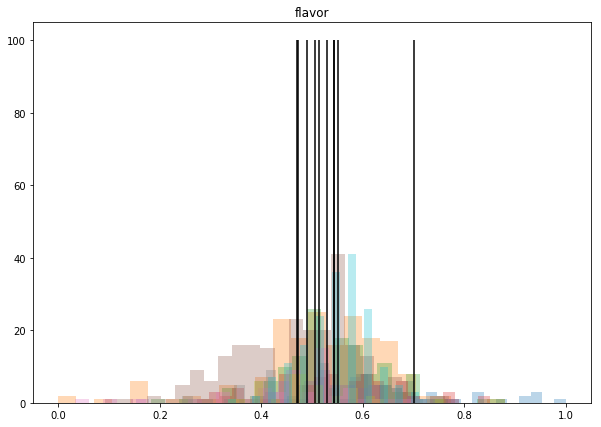

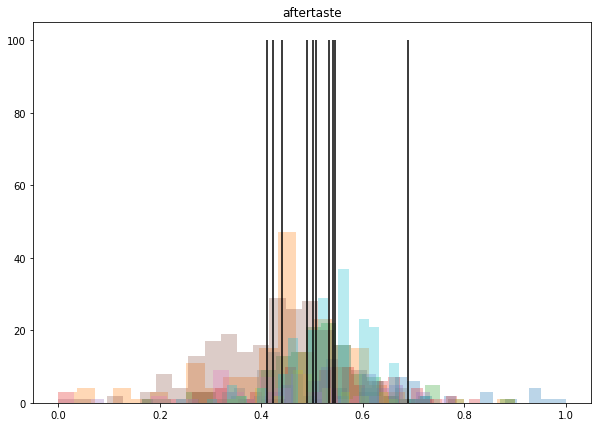

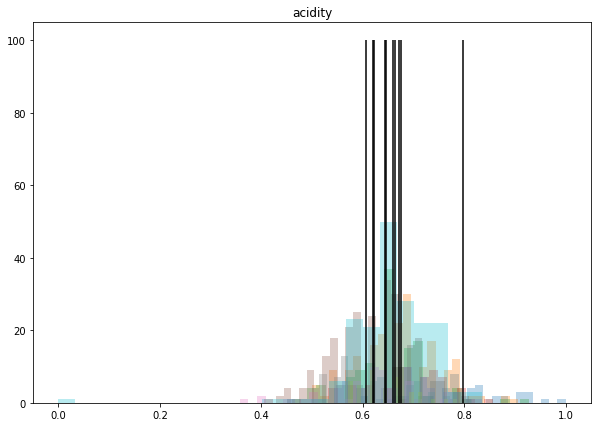

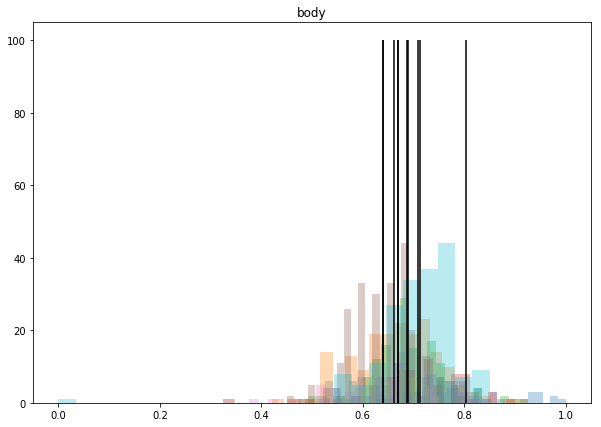

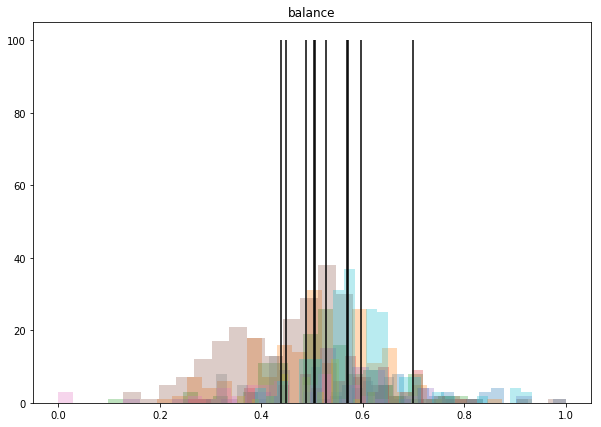

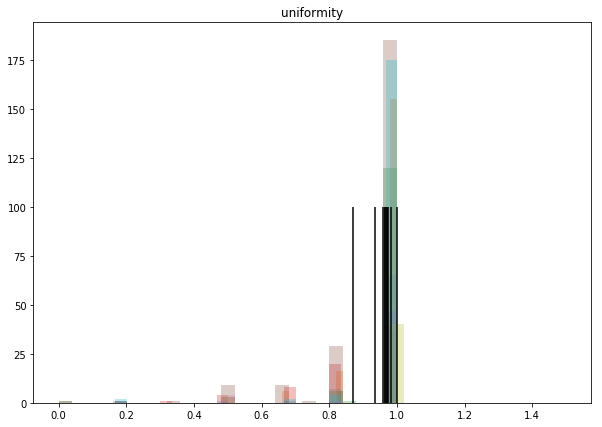

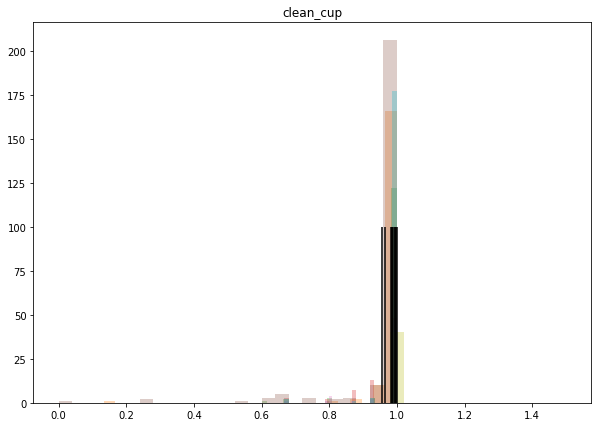

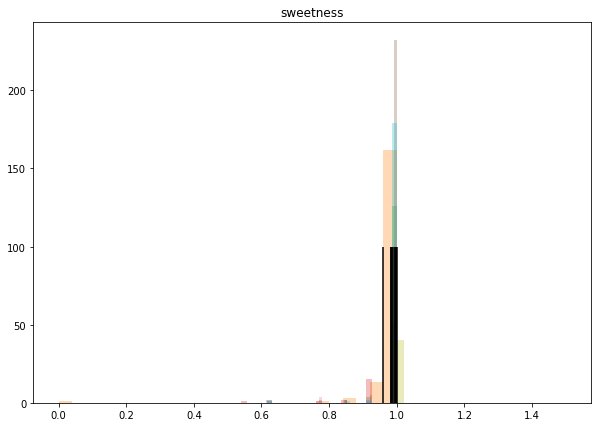

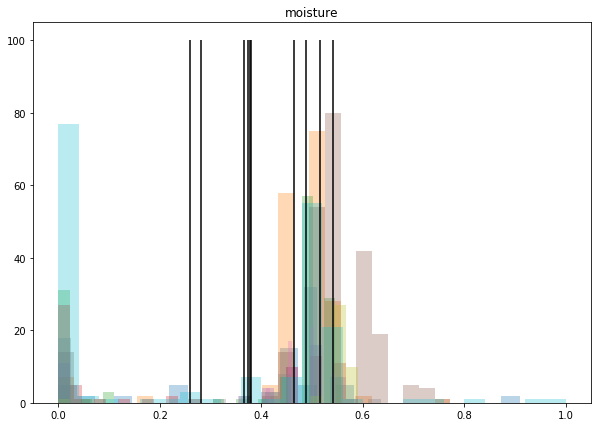

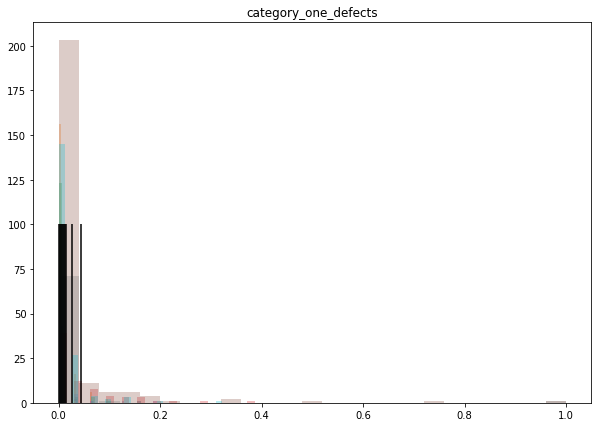

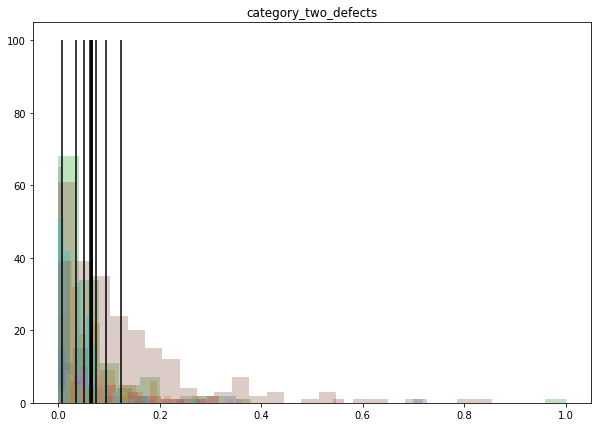

In [364]:
for feature in data_features_scaled.columns:
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    for country in country_comparison['country_of_origin'].unique():
        dist = hists.loc[hists['country_of_origin'] == country][feature]
        ax.hist(dist, alpha=0.3, bins=25)
        ax.vlines(dist.mean(), 0, 100)
        ax.set_title(feature)
    plt.show()

It looks like the distribution means between countries are very close, which is likely part of what's making classification so difficult.

### 4.6 - ROC

In [367]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

## 5. iNterpret

In [365]:
pd.

{'svc': 0.323943661971831,
 'mode': 0.22201317027281278,
 'svc c=11,000': 0.464789,
 'svc c=11,165, cv=3, kernel=poly': 340546,
 'KNN defaults': 0.38967136150234744,
 'KNN 10 neighbors': 0.38967136150234744}